In [4]:
import numpy as np
import scipy as sp
import matplotlib as mpl
from numpy import linalg    
import matplotlib.pyplot as plt
from functools import partial
from scipy.misc import derivative
import itertools

In [69]:
# For interactive plots
%matplotlib widget

# Task 1

## Lagrange polynomial

In [23]:
def find_lj (xs: np.array, x: float, j: int):
    assert len(xs) >= 2, "invalid number of points"
    assert j >= 0 and j < len(xs), "invalid index"
    res = 1.0
    for m in range(0, len(xs)):
        if (j != m):
            res *= (x - xs[m])/(xs[j] - xs[m])
    return res

def lagrange(xs: np.array, ys: np.array, x: float):
    assert len(xs) >= 2 and len(ys) >= 2, "invalid number of points"
    assert len(xs) == len(ys), "invalid number of points"
    res = 0.0
    for j in range(0, len(xs)):
        res += ys[j]* find_lj(xs, x, j)
    return res

## solution

In [76]:
def f(x):
    return 1/(1 + 25*x**2)
Xs = np.linspace(-1, 1, 500)
fs = f(Xs)

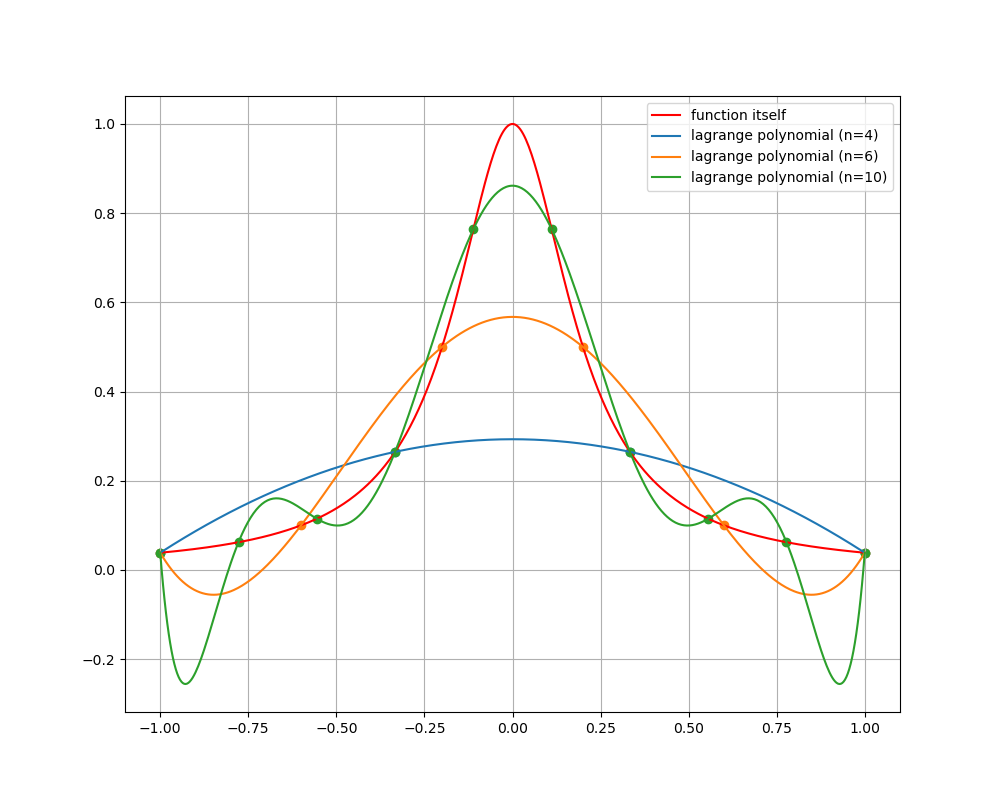

In [79]:
plt.figure(figsize=[10,8])
plt.plot(Xs, fs, label="function itself", color="red")

n = 4
xs = np.linspace(-1, 1, n)
ys = f(xs)
ps = np.array([lagrange(xs, ys, x) for x in Xs])
plt.scatter(xs, ys)
plt.plot(Xs, ps, label=f"lagrange polynomial (n={n})")

n = 6
xs = np.linspace(-1, 1, n)
ys = f(xs)
ps = np.array([lagrange(xs, ys, x) for x in Xs])
plt.scatter(xs, ys)
plt.plot(Xs, ps, label=f"lagrange polynomial (n={n})")

n = 10
xs = np.linspace(-1, 1, n)
ys = f(xs)
ps = np.array([lagrange(xs, ys, x) for x in Xs])
plt.scatter(xs, ys)
plt.plot(Xs, ps, label=f"lagrange polynomial (n={n})")
plt.legend()
plt.grid()

## Newton polynomial

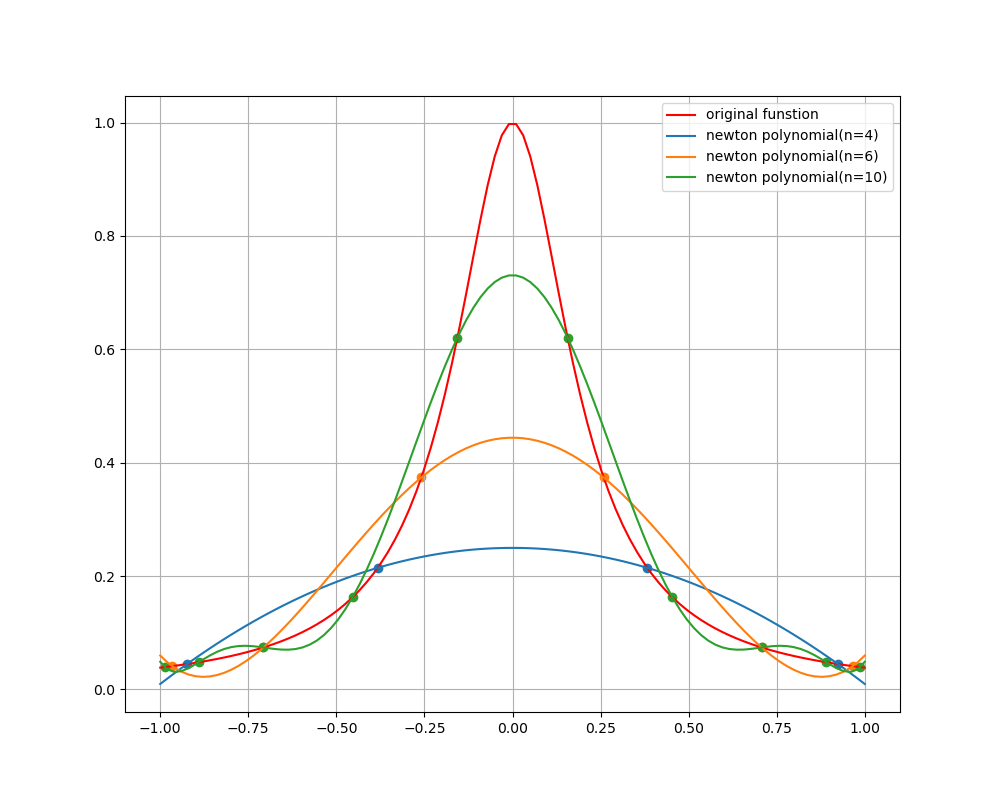

In [118]:
def find_dkn(xs: np.array, ys: np.array, k: int, n: int) -> float:
    #assert len(xs) == len(ys), "invalid number of points"
    if (k==n):
        return ys[0]
    d1 = find_dkn(xs, ys[:-1], k, n-1)
    d2 = find_dkn(xs, ys[1:], k+1, n)
    t1 = xs[k]
    t2 = xs[n]
    return (d2 - d1)/(t2 - t1)

def newton_polynomial(xs: np.array, ys: np.array) -> np.array:
    assert len(xs) == len(ys), "invalid number of points"
    return np.array([find_dkn(xs, ys, 0, k) for k in range(len(xs))])

def newton_polynomial_value(xs: np.array, coefs: np.array, x: float) -> float:
    assert len(xs) == len(ys), "invalid number of points"
    res = 0
    n = len(xs)
    for i in range(n):
        m = 1.0
        for j in range(i):
            m *= x - xs[j]
        res += m * coefs[i]
    return res

def get_interpolation_points(a : float, b : float, n : int) -> np.array:
    points = []
    m = (a + b) / 2.0
    d = (b - a) / 2.0
    return np.array([m + d * np.cos((2*i - 1) * np.pi / (2*n)) for i in range(1, n+1)])

a, b = -1, 1
xs = np.linspace(a, b, 100)
fs = f(xs)

plt.figure(figsize=[10, 8])
plt.plot(xs, fs, color="red", label="original funstion")

n = 4
points = get_interpolation_points(a, b, n)
ys = f(points)
pol = newton_polynomial(points, ys)
ps = newton_polynomial_value(points, pol, xs)
plt.scatter(points, ys)
plt.plot(xs, ps, label=f"newton polynomial(n={n})")

n = 6
points = get_interpolation_points(a, b, n)
ys = f(points)
pol = newton_polynomial(points, ys)
ps = newton_polynomial_value(points, pol, xs)
plt.scatter(points, ys)
plt.plot(xs, ps, label=f"newton polynomial(n={n})")

n = 10
points = get_interpolation_points(a, b, n)
ys = f(points)
pol = newton_polynomial(points, ys)
ps = newton_polynomial_value(points, pol, xs)
plt.scatter(points, ys)
plt.plot(xs, ps, label=f"newton polynomial(n={n})")

plt.legend()
plt.grid()

In [2]:
def integrate_simple(function, a: float, b: float, points_n: int) -> float:
    assert a <= b, "invalid bounds"
    step = (b - a) / points_n
    res = 0.5 * (function(a) + function(b))
    x_i = a + step
    for i in range(0, points_n):
        x_i += step
        res += function(x_i)
    return res * step

In [5]:
def interpolation (function, a: float, b:float, x: float):
    assert a <= b, "invalid bounds"
    m = (a + b) / 2
    return function(a) *((x-m)*(x-b))/((a-m)*(a-b)) + function(m) *((x-a)*(x-b))/((m-a)*(m-b)) + function(b) *((x-a)*(x-m))/((b-m)*(b-a))

In [6]:
def integrate_simpson(func, a: float, b: float, n: int) -> float:
    assert a <= b, "invalid bounds" 
    h = (b - a) / float(n)
    result = 0.0
    for i in range(0, n, 2):
        x_i = a + i * h
        x_j = x_i + h
        x_k = x_j + h
        f_i = func(x_i)
        f_j = func(x_j)
        f_k = func(x_k)
        result += (f_i + 4.0 * f_j + f_k)
    return (result / 3.0) * h

In [7]:
def f(x: float) -> float: 
    return np.sin(100.0 * x) * np.exp(-x ** 2.0) * np.cos(2.0 * x)

In [8]:
a1 = 0.0
b1 = 3.0
n1 = 10000

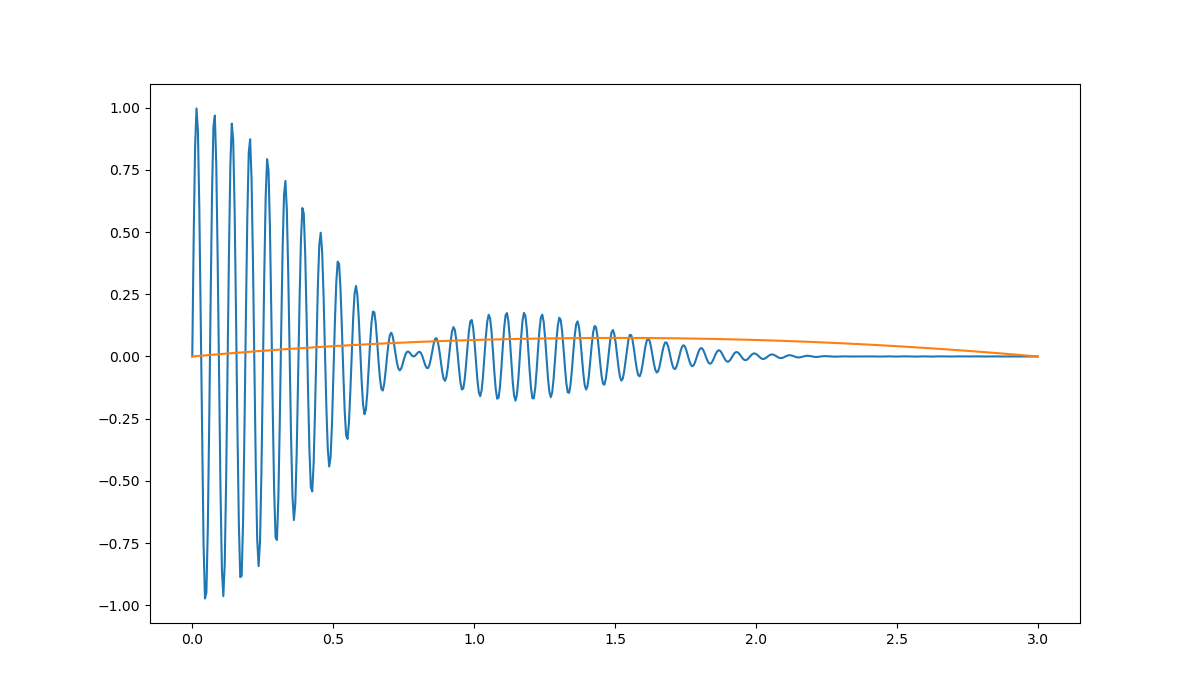

In [9]:
xs = np.linspace(a1, b1, 600)
fs = f(xs)
ps = interpolation(f, a1, b1, xs)
plt.figure(figsize=[12,7])
plt.plot(xs, fs)
plt.plot(xs, ps)

In [10]:
v1_trap = integrate_simple(f, a1, b1, n1)
v1_simp = integrate_simpson(f, a1, b1, n1)

In [11]:
print(f'trap: {v1_trap}')
print(f'simp: {v1_simp}')
print(f'|simp- trap|: {abs(v1_simp - v1_trap)}')

trap: 0.009996278175155068
simp: 0.010006097905416868
|simp- trap|: 9.819730261800136e-06


## Task 2

In [12]:
eps2_tail = 1e-4 # Tail cotoff precision
eps2_int = 1e-4 # Integral calc precision

In [13]:
# |cos(x)| / (2 + x^2) <= 1 / (2 + x^2)
# Int[1 / (2 + x^2)] = arctan(x / sqrt(2)) / sqrt(2)
# Tail = arctan(x / sqrt(2)) / sqrt(2) | cutoff -> +inf
# eps2_tail = [np.pi / 2 - arctan(cutoff / sqrt(2))] / sqrt(2)
# np.pi / 2 - sqrt(2) * eps2_tail = arctan(cutoff / sqrt(2))
cutoff = np.sqrt(2.0) * np.tan(np.pi / 2.0 - np.sqrt(2.0) * eps2_tail)

In [14]:
a2 = 0.0
b2 = cutoff

In [15]:
def f_2(x: float) -> float: 
    return np.cos(x) / (2.0 + x ** 2.0)

In [16]:
# https://www.wolframalpha.com/input?i=second+derivative+cos%28x%29+%2F+%282+%2B+x%5E2%29
f2_second_der_max_abs = 1.0

# eps2_int >= (b - a) / 8.0 * f2_second_der_max_abs * ((b - a) / n) ** 2.0 
# 8.0 * eps2_int / ((b - a) ** 3.0 * f2_second_der_max_abs) >= n ** -2.0
n2 = int((8.0 * eps2_int / ((b2 - a2) ** 3.0 * f2_second_der_max_abs)) ** (-0.5))
h2 = (b2 - a2) / float(n2)

In [17]:
# https://www.wolframalpha.com/input?i=integrate+from+0+to+inf+cos%28x%29+%2F+%282+%2B+x%5E2%29
v2_exact = np.exp(-np.sqrt(2.0)) * np.pi / (2.0 * np.sqrt(2.0))

In [18]:
v2_trap = integrate_simple(f_2, 0, cutoff, int(n2))

In [19]:
print(f'h2 = {h2}')
print(f'v2_trap = {v2_trap}')
print(f'v2_exact = {v2_exact}')
print(f'|exact - trap|: {abs(v2_trap - v2_exact)}')

h2 = 0.00028284271906331003
v2_trap = 0.26989337344251424
v2_exact = 0.2700347978496372
|exact - trap|: 0.00014142440712294757


## Task 3

In [20]:
a3 = 0.0
b3 = 10.
0
n3 = 100000

In [21]:
def by_part(x: float) -> float:
    return 2.0 * np.sqrt(x) * np.sin(x)


def f3(x: float) -> float:
    return 2.0 * np.sqrt(x) * np.cos(x)

In [22]:
# Int_0_10[sin(x) / sqrt(x)] = [2 * sqrt(x) * sin(x)]_0_10 - # Int_0_10[2 * sqrt(x) * cos(x)]
v3_trap = (by_part(10.0) - by_part(0.0)) - integrate_simple(f3, a3, b3, n3)

In [23]:
# https://www.wolframalpha.com/input?i=integrate+from+0+to+10+sin%28x%29+%2F+sqrt%28x%29
print(f'v3_trap: {v3_trap}')

v3_trap: 1.5261872624494979
